# Import functions & load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras import metrics
from keras.models import Sequential
from tensorflow.keras.models import Model,load_model
from keras.layers import Input, Dense, Embedding, SimpleRNN, Dropout, concatenate, Lambda, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.losses import BinaryCrossentropy
import tensorflow as tf 

from math import floor
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score,recall_score,roc_auc_score, make_scorer, f1_score, roc_curve, auc
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
import pickle
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

from sklearn.feature_selection import chi2
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
X_train = pd.read_csv('/content/drive/My Drive/BT4012/processed dataset/v4/X_train.csv')
X_test = pd.read_csv('/content/drive/My Drive/BT4012/processed dataset/v4/X_test.csv')
y_train = pd.read_csv('/content/drive/My Drive/BT4012/processed dataset/v4/y_train.csv')
y_test = pd.read_csv('/content/drive/My Drive/BT4012/processed dataset/v4/y_test.csv')

# drop unnamed cols
X_train = X_train.drop(columns=['Unnamed: 0'])
X_test = X_test.drop(columns=['Unnamed: 0'])
y_train = y_train.drop(columns=['Unnamed: 0'])
y_test = y_test.drop(columns=['Unnamed: 0'])

In [ ]:
X_test.head()

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,No_Transactions,No_Orders,No_Payments,No_Accounts,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,orderState_failed,orderState_fulfilled,orderState_pending,customerBillingAddressRegion_Midwest,customerBillingAddressRegion_Multiple,customerBillingAddressRegion_Northeast,customerBillingAddressRegion_Others,customerBillingAddressRegion_South,customerBillingAddressRegion_West,ipCountry_Armenia,ipCountry_China,ipCountry_France,ipCountry_Hong Kong,ipCountry_Iran,ipCountry_Italy,ipCountry_Japan,ipCountry_Morocco,ipCountry_Multiple,ipCountry_Romania,ipCountry_Russia,ipCountry_South Korea,ipCountry_Switzerland,ipCountry_Taiwan,ipCountry_United Kingdom,ipCountry_United States,ipCountry_Unknown
0,0,0.492327,0,0.670533,0.672305,1.411767,-0.205480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,-0.252035,0,-0.090536,-0.000449,0.701246,-0.205480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,1.466506,0,2.705394,2.794331,1.845678,4.866643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.492327,1,1.690437,-0.487255,-1.159686,-0.205480,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,-1.295872,0,-0.090536,-0.000449,0.141112,-0.205480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y_train.head()

,Fraud
0,1
1,0
2,0
3,0
4,1


In [3]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

___
# 1. XGBoost Feature Importance

In [4]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, recall_score
from sklearn.feature_selection import SelectFromModel

In [5]:
base_xgboost_model = XGBClassifier()
base_xgboost_model.fit(X_train, y_train)
y_pred_class = base_xgboost_model.predict(X_test)

## Plot feature importance

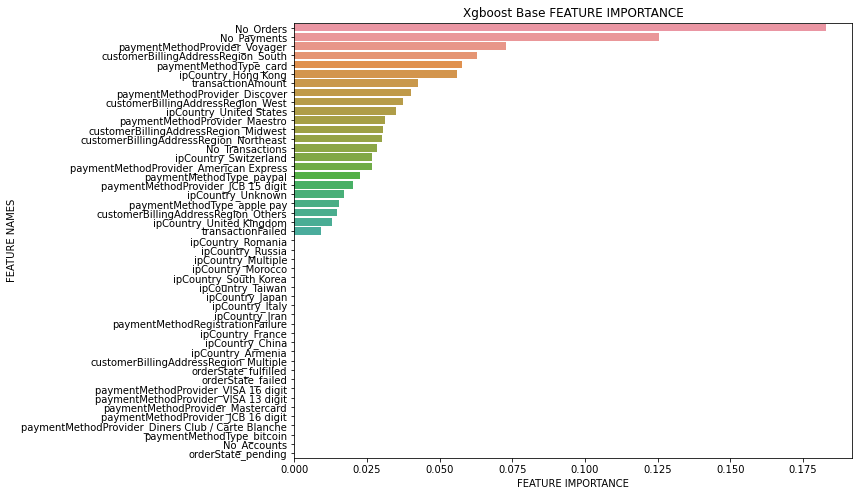

In [6]:
# plot feature importance
plot_feature_importance(base_xgboost_model.feature_importances_, list(X_train.columns),'Xgboost Base ')

## Feature selection with XGBoost Feature Importance Scores
- Note that we only do feature selection using the **train data**

In [7]:
class MyXGBClassifier(XGBClassifier):
	@property
	def coef_(self):
		return None

y_pred = base_xgboost_model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(base_xgboost_model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(base_xgboost_model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train.values)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train.values.ravel())
	# Get train scores
	select_X_train = selection.transform(X_train.values)
	y_pred = selection_model.predict(select_X_train)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_train, predictions)
	recall = recall_score(y_train, predictions)
	print("Thresh=%.5f, n=%d, Accuracy: %.2f%%, Recall: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0, recall))

Accuracy: 85.59%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00000, n=47, Accuracy: 92.32%, Recall: 0.82%
Thresh=0.00

## Drop redundant features and select only useful features
- From the above results, we find that there are a handful of features with 0.000 feature importance. We will treat them as redundant features 
and remove them. 
- Best performing and less complex model:
Thresh=0.02695, n=15, Accuracy: 93.39%, Recall: 84%
Hence, we will set our feature importance threshold to 0.02695 and only consider features with feature importance >= 0.0269

In [19]:
importance = base_xgboost_model.feature_importances_
# Redundant features are those with feature importance score of 0.000
redundant_features = list(pd.Series(X_train.columns)[list(importance == 0)])
print("\nRedundant Feature Names:", redundant_features)
print("Number of Redundant Features:", len(redundant_features))


Redundant Feature Names: ['paymentMethodRegistrationFailure', 'No_Accounts', 'paymentMethodType_bitcoin', 'paymentMethodProvider_Diners Club / Carte Blanche', 'paymentMethodProvider_JCB 16 digit', 'paymentMethodProvider_Mastercard', 'paymentMethodProvider_VISA 13 digit', 'paymentMethodProvider_VISA 16 digit', 'orderState_failed', 'orderState_fulfilled', 'orderState_pending', 'customerBillingAddressRegion_Multiple', 'ipCountry_Armenia', 'ipCountry_China', 'ipCountry_France', 'ipCountry_Iran', 'ipCountry_Italy', 'ipCountry_Japan', 'ipCountry_Morocco', 'ipCountry_Multiple', 'ipCountry_Romania', 'ipCountry_Russia', 'ipCountry_South Korea', 'ipCountry_Taiwan']
Number of Redundant Features: 24


In [21]:
# Unselected features are those with feature importance score of less than 0.0269
unselected_features = list(pd.Series(X_train.columns)[list(importance < 0.0269)])
print("\nUnselected Feature Names:", unselected_features)
print("Number of Unselected Features:", len(unselected_features))


Unselected Feature Names: ['paymentMethodRegistrationFailure', 'transactionFailed', 'No_Accounts', 'paymentMethodType_apple pay', 'paymentMethodType_bitcoin', 'paymentMethodType_paypal', 'paymentMethodProvider_American Express', 'paymentMethodProvider_Diners Club / Carte Blanche', 'paymentMethodProvider_JCB 15 digit', 'paymentMethodProvider_JCB 16 digit', 'paymentMethodProvider_Mastercard', 'paymentMethodProvider_VISA 13 digit', 'paymentMethodProvider_VISA 16 digit', 'orderState_failed', 'orderState_fulfilled', 'orderState_pending', 'customerBillingAddressRegion_Multiple', 'customerBillingAddressRegion_Others', 'ipCountry_Armenia', 'ipCountry_China', 'ipCountry_France', 'ipCountry_Iran', 'ipCountry_Italy', 'ipCountry_Japan', 'ipCountry_Morocco', 'ipCountry_Multiple', 'ipCountry_Romania', 'ipCountry_Russia', 'ipCountry_South Korea', 'ipCountry_Taiwan', 'ipCountry_United Kingdom', 'ipCountry_Unknown']
Number of Unselected Features: 32


### Final set of features to be used

In [22]:
# X after Feature Selection 
fs_X_train = X_train.drop(columns = unselected_features).copy()
print(len(fs_X_train.columns))
fs_X_train.columns

15


Index(['transactionAmount', 'No_Transactions', 'No_Orders', 'No_Payments',
       'paymentMethodType_card', 'paymentMethodProvider_Discover',
       'paymentMethodProvider_Maestro', 'paymentMethodProvider_Voyager',
       'customerBillingAddressRegion_Midwest',
       'customerBillingAddressRegion_Northeast',
       'customerBillingAddressRegion_South',
       'customerBillingAddressRegion_West', 'ipCountry_Hong Kong',
       'ipCountry_Switzerland', 'ipCountry_United States'],
      dtype='object')

___
# 2. RandomForest Feature Importance
- Note that we only do feature selection using the **train data**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import *

In [24]:
rf_base = RandomForestClassifier(n_estimators = 100, random_state = 2022, min_samples_leaf=1, min_samples_split=5, max_depth=10)
rf_base.fit(X_train, y_train)
y_pred_class = rf_base.predict(X_test)

## Plot Feature Importance

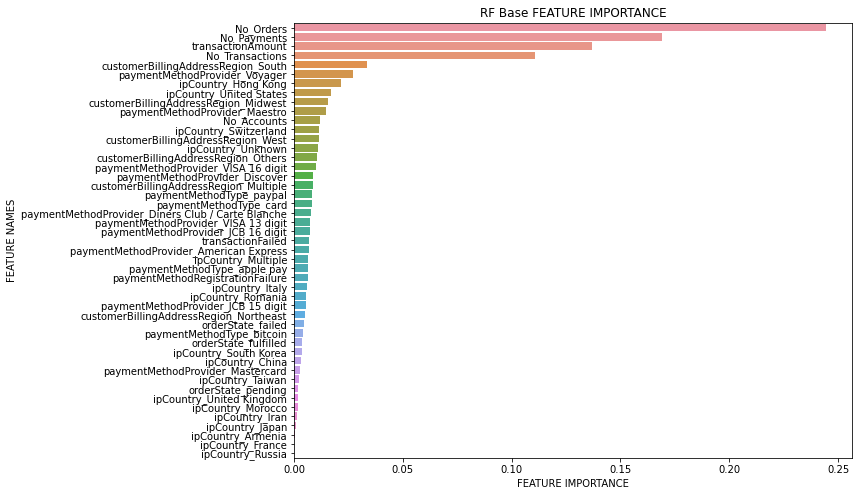

In [ ]:
plot_feature_importance(rf_base.feature_importances_, list(X_train.columns),'RF Base ')

In [32]:
class MyRFClassifier(RandomForestClassifier):
	@property
	def coef_(self):
		return None

y_pred = rf_base.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(rf_base.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(rf_base, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train.values)
	# train model
	selection_model = RandomForestClassifier()
	selection_model.fit(select_X_train, y_train.values.ravel())
	# 
	select_X_train = selection.transform(X_train.values)
	y_pred = selection_model.predict(select_X_train)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_train, predictions)
	recall = recall_score(y_train, predictions)
	print("Thresh=%.5f, n=%d, Accuracy: %.2f%%, Recall: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0, recall))

Accuracy: 88.98%
Thresh=0.00002, n=47, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00011, n=46, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00021, n=45, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00078, n=44, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00137, n=43, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00164, n=42, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00172, n=41, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00188, n=40, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00230, n=39, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00281, n=38, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00340, n=37, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00342, n=36, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00345, n=35, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00391, n=34, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00445, n=33, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00513, n=32, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00529, n=31, Accuracy: 100.00%, Recall: 1.00%
Thresh=0.00571, n=30, Accuracy: 100.00%, Recall:

## Drop redundant features and select only useful features
- From the above results, we find that there are a handful of features with 0.000 feature importance. We will treat them as redundant features 
and remove them. 
- Best performing and less complex model:
Thresh=0.01139, n=13, Accuracy: 100, Recall: 100%
Hence, we will set our feature importance threshold to 0.01139and only consider features with feature importance >= 0.01135

In [33]:
importance = rf_base.feature_importances_
# Redundant features 
redundant_features = list(pd.Series(X_train.columns)[list(importance==0)])
print("\nRedundant Feature Names:", redundant_features)
print("Number of Redundant Features:", len(redundant_features))


Redundant Feature Names: []
Number of Redundant Features: 0


In [37]:
# Unselected features are those with feature importance score of less than 0.01116
unselected_features = list(pd.Series(X_train.columns)[list(importance <= 0.01135)])
print("\nUnselected Feature Names:", unselected_features)
print("Number of Unselected Features:", len(unselected_features))


Unselected Feature Names: ['paymentMethodRegistrationFailure', 'transactionFailed', 'paymentMethodType_apple pay', 'paymentMethodType_bitcoin', 'paymentMethodType_card', 'paymentMethodType_paypal', 'paymentMethodProvider_American Express', 'paymentMethodProvider_Diners Club / Carte Blanche', 'paymentMethodProvider_Discover', 'paymentMethodProvider_JCB 15 digit', 'paymentMethodProvider_JCB 16 digit', 'paymentMethodProvider_Mastercard', 'paymentMethodProvider_VISA 13 digit', 'paymentMethodProvider_VISA 16 digit', 'orderState_failed', 'orderState_fulfilled', 'orderState_pending', 'customerBillingAddressRegion_Multiple', 'customerBillingAddressRegion_Northeast', 'customerBillingAddressRegion_Others', 'ipCountry_Armenia', 'ipCountry_China', 'ipCountry_France', 'ipCountry_Iran', 'ipCountry_Italy', 'ipCountry_Japan', 'ipCountry_Morocco', 'ipCountry_Multiple', 'ipCountry_Romania', 'ipCountry_Russia', 'ipCountry_South Korea', 'ipCountry_Taiwan', 'ipCountry_United Kingdom', 'ipCountry_Unknown']

### Final set of features to be used

In [38]:
rf_X_train = X_train.drop(columns = unselected_features).copy()
print(len(rf_X_train.columns))
rf_X_train.columns

13


Index(['transactionAmount', 'No_Transactions', 'No_Orders', 'No_Payments',
       'No_Accounts', 'paymentMethodProvider_Maestro',
       'paymentMethodProvider_Voyager', 'customerBillingAddressRegion_Midwest',
       'customerBillingAddressRegion_South',
       'customerBillingAddressRegion_West', 'ipCountry_Hong Kong',
       'ipCountry_Switzerland', 'ipCountry_United States'],
      dtype='object')

___
# 3. SelectKBest Feature Selection
- ANOVA F test

## a. ANOVA F-Test

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### Create Feature Scores

In [ ]:
f_fs = SelectKBest(score_func = f_classif, k='all')
f_fs.fit(X_train, y_train)

SelectKBest(k='all')

### Visualise Feature Scores

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text major ticklabel objects>)

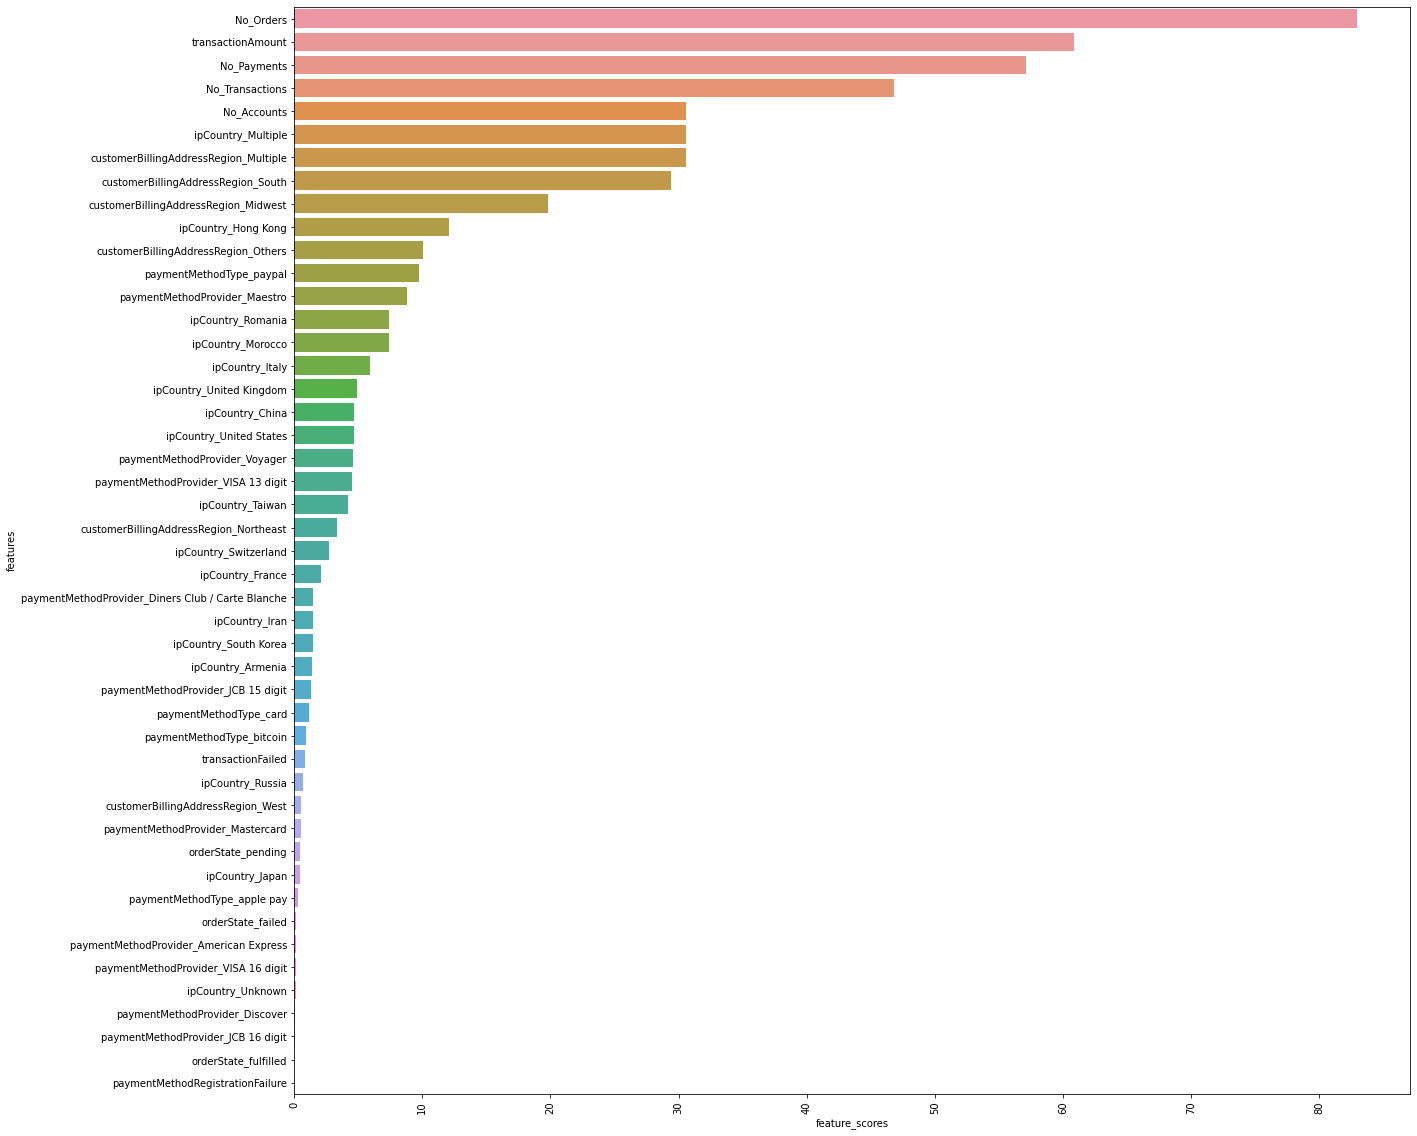

In [ ]:
temp = pd.DataFrame({'features':X_train.columns, 'feature_scores': f_fs.scores_})
temp = temp.sort_values(by=['feature_scores'], ascending=False)
# Plot the feature scores visually
plt.figure(figsize=(20,20))
sns.barplot(y=temp['features'], x=temp['feature_scores'], orient = 'h')
plt.xticks(rotation = 90)



### Looking at the feature scores, we set the cut-off to 1 and select features that have an importance scores of greater than 1

### Final Features to be used

In [ ]:
temp['feature_scores']

4     82.934076
1     60.874209
5     57.140181
3     46.804699
6     30.578346
38    30.578346
25    30.578346
28    29.396491
24    19.851237
33    12.101180
27    10.034008
10     9.754455
16     8.779922
39     7.441250
37     7.441250
35     5.921166
44     4.912541
31     4.696416
45     4.644793
20     4.560045
18     4.488683
43     4.195268
26     3.357737
42     2.736293
32     2.074751
12     1.471941
34     1.456918
41     1.456918
30     1.378156
14     1.352215
9      1.196807
8      0.962514
2      0.875252
40     0.686590
29     0.577631
17     0.570748
23     0.497354
36     0.433358
7      0.329896
21     0.159537
11     0.147379
19     0.138884
46     0.111229
13     0.093743
15     0.088710
22     0.019354
0      0.003745
Name: feature_scores, dtype: float64

In [ ]:
final_features = temp[temp['feature_scores'] > 1]
print(len(final_features.features))
print(list(final_features.features))

31
['No_Orders', 'transactionAmount', 'No_Payments', 'No_Transactions', 'No_Accounts', 'ipCountry_Multiple', 'customerBillingAddressRegion_Multiple', 'customerBillingAddressRegion_South', 'customerBillingAddressRegion_Midwest', 'ipCountry_Hong Kong', 'customerBillingAddressRegion_Others', 'paymentMethodType_paypal', 'paymentMethodProvider_Maestro', 'ipCountry_Romania', 'ipCountry_Morocco', 'ipCountry_Italy', 'ipCountry_United Kingdom', 'ipCountry_China', 'ipCountry_United States', 'paymentMethodProvider_Voyager', 'paymentMethodProvider_VISA 13 digit', 'ipCountry_Taiwan', 'customerBillingAddressRegion_Northeast', 'ipCountry_Switzerland', 'ipCountry_France', 'paymentMethodProvider_Diners Club / Carte Blanche', 'ipCountry_Iran', 'ipCountry_South Korea', 'ipCountry_Armenia', 'paymentMethodProvider_JCB 15 digit', 'paymentMethodType_card']


## b. Chi2 + ANOVA F-test
- Chi2 for categorical data
- ANOVA for numerical data

In [ ]:
from sklearn.feature_selection import chi2 

In [ ]:
numerical_cols = ['transactionAmount', 'No_Orders','No_Transactions', 'No_Payments', 'No_Accounts']
cat_cols = list(set(X_train.columns).difference(numerical_cols))
cat_cols
# cat_data[(cat_data >= 0).all(1)== False]


['ipCountry_Japan',
 'ipCountry_Russia',
 'paymentMethodProvider_JCB 15 digit',
 'customerBillingAddressRegion_Northeast',
 'customerBillingAddressRegion_West',
 'ipCountry_United Kingdom',
 'paymentMethodType_bitcoin',
 'ipCountry_Unknown',
 'ipCountry_France',
 'ipCountry_Iran',
 'ipCountry_Morocco',
 'paymentMethodProvider_VISA 13 digit',
 'ipCountry_Multiple',
 'customerBillingAddressRegion_Others',
 'ipCountry_South Korea',
 'paymentMethodType_apple pay',
 'paymentMethodType_card',
 'ipCountry_China',
 'ipCountry_Armenia',
 'ipCountry_Hong Kong',
 'orderState_pending',
 'paymentMethodProvider_JCB 16 digit',
 'customerBillingAddressRegion_Multiple',
 'ipCountry_Romania',
 'paymentMethodProvider_Maestro',
 'ipCountry_United States',
 'ipCountry_Switzerland',
 'paymentMethodProvider_VISA 16 digit',
 'paymentMethodRegistrationFailure',
 'paymentMethodProvider_American Express',
 'customerBillingAddressRegion_South',
 'paymentMethodProvider_Mastercard',
 'paymentMethodProvider_Voyager'

### Chi2 Selection

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 7 Text major ticklabel objects>)

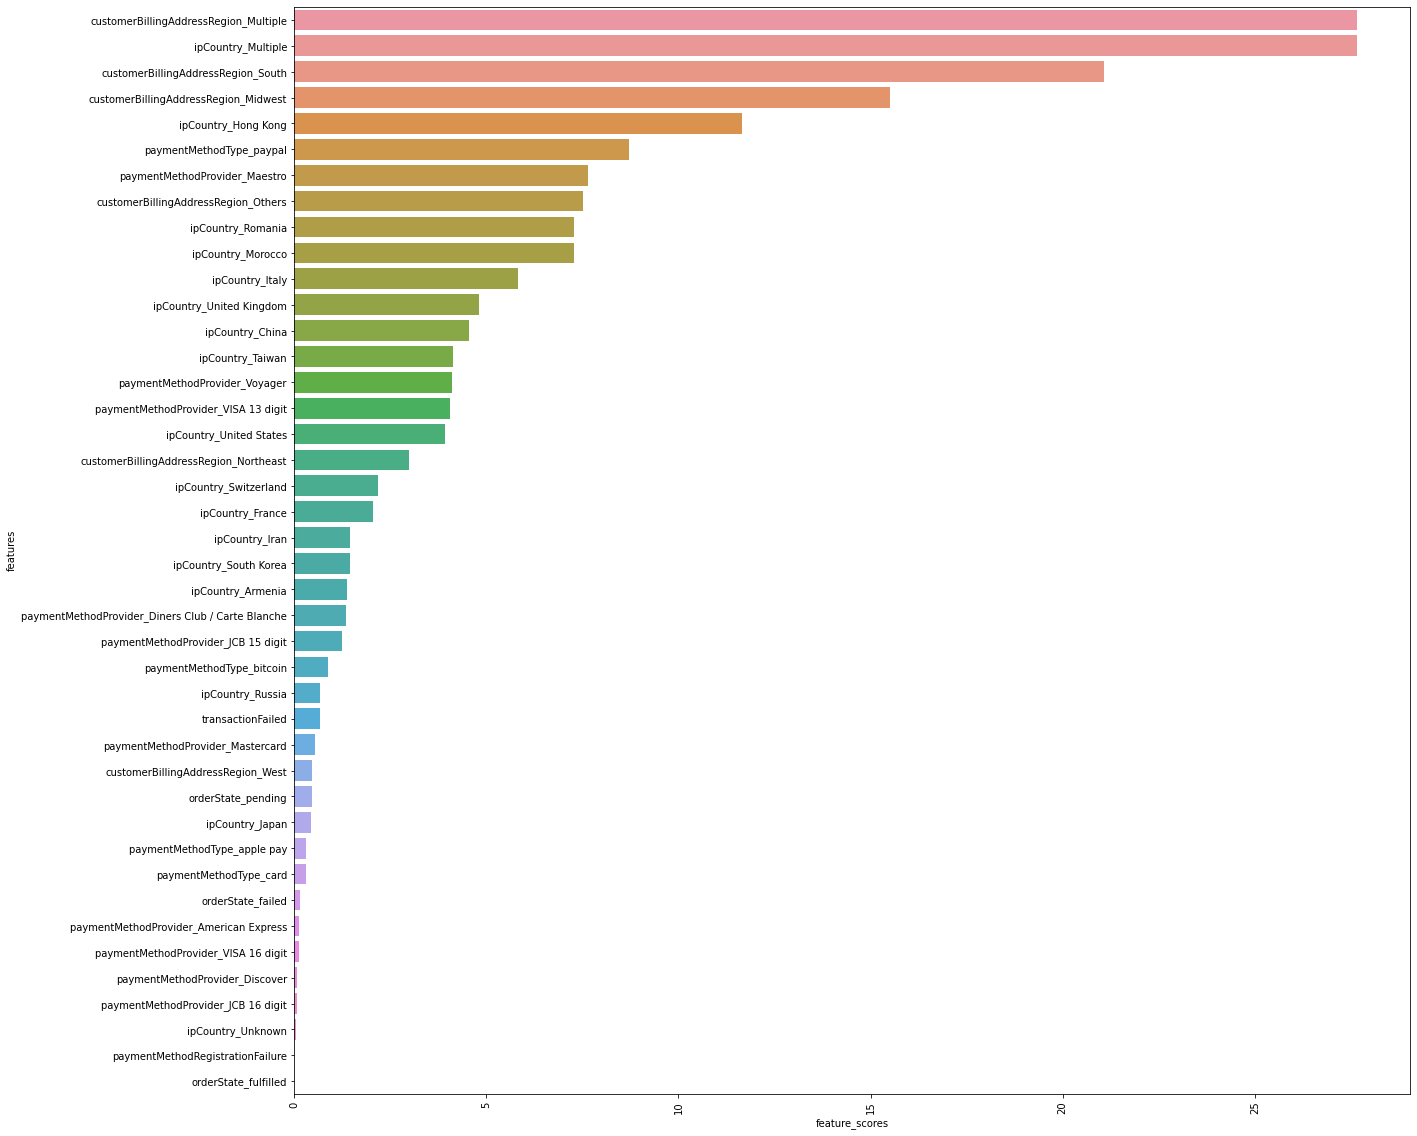

In [ ]:
cat_data = X_train[cat_cols]
chi_fs = SelectKBest(score_func = chi2, k='all')
chi_fs.fit(cat_data, y_train)

temp = pd.DataFrame({'features':cat_data.columns, 'feature_scores': chi_fs.scores_})
temp = temp.sort_values(by=['feature_scores'], ascending=False)
# Plot the feature scores visually
plt.figure(figsize=(20,20))
sns.barplot(y=temp['features'], x=temp['feature_scores'], orient = 'h')
plt.xticks(rotation = 90)

### Looking at the feature scores, we set the cut-off to 1 and select features that have an importance scores of greater than 1

In [ ]:
temp['feature_scores']

22    27.654450
12    27.654450
30    21.082241
40    15.494405
19    11.643979
39     8.716012
24     7.658305
13     7.530228
23     7.277487
10     7.277487
41     5.821990
5      4.809353
17     4.560048
37     4.122302
32     4.100134
11     4.055620
25     3.939230
3      2.998249
26     2.172787
8      2.061151
9      1.455497
14     1.455497
18     1.374101
34     1.354204
2      1.253034
6      0.892659
1      0.687050
36     0.679062
31     0.543197
4      0.470675
20     0.468101
0      0.428321
15     0.302838
16     0.301632
33     0.144456
29     0.137868
27     0.117139
35     0.087302
21     0.072170
7      0.058340
28     0.003304
38     0.003108
Name: feature_scores, dtype: float64

In [ ]:
final_cat_features = temp[temp['feature_scores'] > 1]
final_cat_features = list(final_cat_features.features)
print(len(final_cat_features))
final_cat_features

25


['customerBillingAddressRegion_Multiple',
 'ipCountry_Multiple',
 'customerBillingAddressRegion_South',
 'customerBillingAddressRegion_Midwest',
 'ipCountry_Hong Kong',
 'paymentMethodType_paypal',
 'paymentMethodProvider_Maestro',
 'customerBillingAddressRegion_Others',
 'ipCountry_Romania',
 'ipCountry_Morocco',
 'ipCountry_Italy',
 'ipCountry_United Kingdom',
 'ipCountry_China',
 'ipCountry_Taiwan',
 'paymentMethodProvider_Voyager',
 'paymentMethodProvider_VISA 13 digit',
 'ipCountry_United States',
 'customerBillingAddressRegion_Northeast',
 'ipCountry_Switzerland',
 'ipCountry_France',
 'ipCountry_Iran',
 'ipCountry_South Korea',
 'ipCountry_Armenia',
 'paymentMethodProvider_Diners Club / Carte Blanche',
 'paymentMethodProvider_JCB 15 digit']

### Annova F Test for Numerical Features

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text major ticklabel objects>)

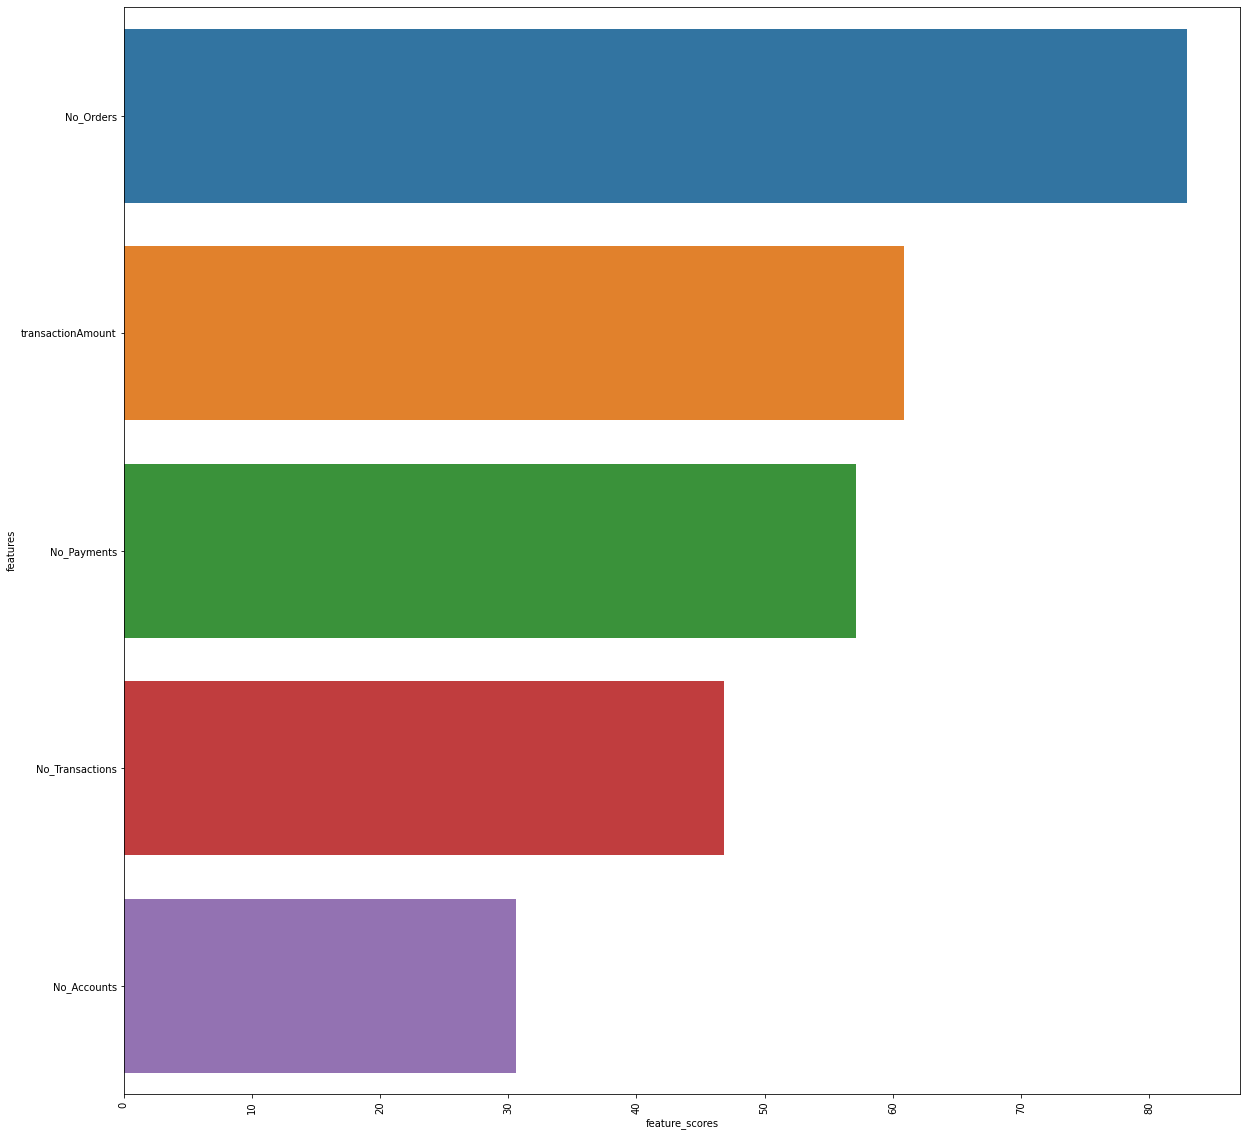

In [ ]:
num_data = X_train[numerical_cols]
num_fs = SelectKBest(score_func = f_classif, k='all')
num_fs.fit(num_data, y_train)

temp = pd.DataFrame({'features':num_data.columns, 'feature_scores': num_fs.scores_})
temp = temp.sort_values(by=['feature_scores'], ascending=False)
# Plot the feature scores visually
plt.figure(figsize=(20,20))
sns.barplot(y=temp['features'], x=temp['feature_scores'], orient = 'h')
plt.xticks(rotation = 90)

In [ ]:
temp['feature_scores'] # all seems to be important, so include all

1    82.934076
0    60.874209
3    57.140181
2    46.804699
4    30.578346
Name: feature_scores, dtype: float64

### Final Combined Features to be used (Numerical + Categorical)

In [ ]:
final_combined_features = final_cat_features + list(temp['features'])
# print(len(final_combined_features))
print(len(final_combined_features))
final_combined_features

30


['customerBillingAddressRegion_Multiple',
 'ipCountry_Multiple',
 'customerBillingAddressRegion_South',
 'customerBillingAddressRegion_Midwest',
 'ipCountry_Hong Kong',
 'paymentMethodType_paypal',
 'paymentMethodProvider_Maestro',
 'customerBillingAddressRegion_Others',
 'ipCountry_Romania',
 'ipCountry_Morocco',
 'ipCountry_Italy',
 'ipCountry_United Kingdom',
 'ipCountry_China',
 'ipCountry_Taiwan',
 'paymentMethodProvider_Voyager',
 'paymentMethodProvider_VISA 13 digit',
 'ipCountry_United States',
 'customerBillingAddressRegion_Northeast',
 'ipCountry_Switzerland',
 'ipCountry_France',
 'ipCountry_Iran',
 'ipCountry_South Korea',
 'ipCountry_Armenia',
 'paymentMethodProvider_Diners Club / Carte Blanche',
 'paymentMethodProvider_JCB 15 digit',
 'No_Orders',
 'transactionAmount',
 'No_Payments',
 'No_Transactions',
 'No_Accounts']